# Modeling with Pycaret

To begin my exploration into modeling we will use PyCaret to create some rough forecasting models to understand how the data may be forecast. AFter this exploration if the results are promising, then we will move on to pick specific models to use in order to create a more tailored and specific model targeting our forecasting needs.

In [1]:
import pandas as pd
import prophet
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# As always, load the data

arrivals = pd.read_csv('../NZ Data/Arrivals Data Cleaned.csv', skipinitialspace = True, parse_dates = True, \
                       index_col = 0)
accomodations = pd.read_csv('../NZ Data/Accomodation Data Cleaned.csv', skipinitialspace = True, parse_dates = True, \
                       index_col = 0)

In [3]:
arrivals.columns = arrivals.columns.str.replace(r' $','', regex = True)

In [4]:
arrivals.head()

,BusinessAuckland,BusinessChristchurch,BusinessDunedin,BusinessHamilton,BusinessPalmerston North,BusinessRotorua,BusinessWellington,BusinessQueenstown,BusinessTOTAL NEW ZEALAND PORTS,Holiday/VacationAuckland,...,Visit Friends/RelativesTOTAL NEW ZEALAND PORTS,TOTAL ALL TRAVEL PURPOSESAuckland,TOTAL ALL TRAVEL PURPOSESChristchurch,TOTAL ALL TRAVEL PURPOSESDunedin,TOTAL ALL TRAVEL PURPOSESHamilton,TOTAL ALL TRAVEL PURPOSESPalmerston North,TOTAL ALL TRAVEL PURPOSESRotorua,TOTAL ALL TRAVEL PURPOSESWellington,TOTAL ALL TRAVEL PURPOSESQueenstown,TOTAL ALL TRAVEL PURPOSESTOTAL NEW ZEALAND PORTS
Date,,,,,,,,,,,,,,,,,,,,,
1978-04-01,3428.0,468.0,0.0,0.0,0.0,0.0,492.0,0.0,4408.0,10476.0,...,3324.0,19856.0,6240.0,0.0,0.0,0.0,0.0,2116.0,0.0,28524.0
1978-05-01,2264.0,524.0,0.0,0.0,0.0,0.0,428.0,0.0,3236.0,7168.0,...,3568.0,15428.0,5240.0,0.0,0.0,0.0,0.0,2156.0,0.0,23060.0
1978-06-01,2136.0,280.0,0.0,0.0,0.0,0.0,384.0,0.0,2880.0,4640.0,...,2600.0,11416.0,2708.0,0.0,0.0,0.0,0.0,1252.0,0.0,15760.0
1978-07-01,2156.0,324.0,0.0,0.0,0.0,0.0,380.0,0.0,2964.0,6184.0,...,3144.0,14072.0,4900.0,0.0,0.0,0.0,0.0,1480.0,0.0,20892.0
1978-08-01,2304.0,536.0,0.0,0.0,0.0,0.0,496.0,0.0,3416.0,8236.0,...,4204.0,17960.0,7900.0,0.0,0.0,0.0,0.0,2748.0,0.0,28992.0


In [5]:
arrivals.isna().sum()

BusinessAuckland                                    0
BusinessChristchurch                                0
BusinessDunedin                                     0
BusinessHamilton                                    0
BusinessPalmerston North                            0
BusinessRotorua                                     0
BusinessWellington                                  0
BusinessQueenstown                                  0
BusinessTOTAL NEW ZEALAND PORTS                     0
Holiday/VacationAuckland                            0
Holiday/VacationChristchurch                        0
Holiday/VacationDunedin                             0
Holiday/VacationHamilton                            0
Holiday/VacationPalmerston North                    0
Holiday/VacationRotorua                             0
Holiday/VacationWellington                          0
Holiday/VacationQueenstown                          0
Holiday/VacationTOTAL NEW ZEALAND PORTS             0
Visit Friends/RelativesAuckl

In [6]:
arrivals.dtypes

BusinessAuckland                                    float64
BusinessChristchurch                                float64
BusinessDunedin                                     float64
BusinessHamilton                                    float64
BusinessPalmerston North                            float64
BusinessRotorua                                     float64
BusinessWellington                                  float64
BusinessQueenstown                                  float64
BusinessTOTAL NEW ZEALAND PORTS                     float64
Holiday/VacationAuckland                            float64
Holiday/VacationChristchurch                        float64
Holiday/VacationDunedin                             float64
Holiday/VacationHamilton                            float64
Holiday/VacationPalmerston North                    float64
Holiday/VacationRotorua                             float64
Holiday/VacationWellington                          float64
Holiday/VacationQueenstown              

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
y = arrivals[['BusinessAuckland']]

<AxesSubplot:title={'center':'Residual IDs'}, xlabel='Date'>

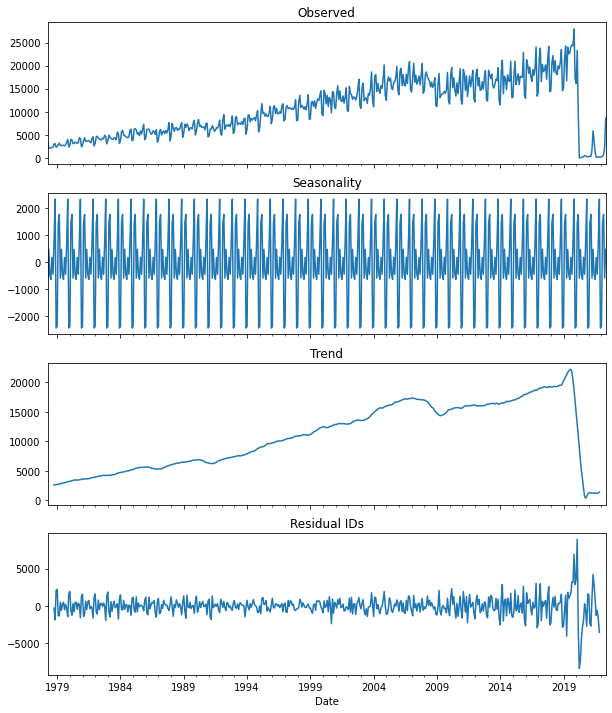

In [9]:
res = seasonal_decompose(y, model='additive')

# Plot the original data, the trend, the seasonality, and the residuals 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,12), sharex=True);

res.observed.plot(ax=ax1, title='Observed')
res.seasonal.plot(ax=ax2, title='Seasonality')
res.trend.plot(ax=ax3, title='Trend')
res.resid.plot(ax=ax4, title='Residual IDs')

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

In [11]:
from pycaret.time_series import TSForecastingExperiment
from pycaret.time_series import pull

In [12]:
exp = TSForecastingExperiment()
exp.setup(arrivals['BusinessAuckland'], fh=24, seasonal_period = 12)

,Description,Value
0,session_id,5301
1,Target,BusinessAuckland
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(530, 1)"
5,Train data shape,"(506, 1)"
6,Test data shape,"(24, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [13]:
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,530.0
1,Summary,Statistics,Actual,Mean,,10812.932075
2,Summary,Statistics,Actual,Median,,10806.0
3,Summary,Statistics,Actual,Standard Deviation,,6034.323748
4,Summary,Statistics,Actual,Variance,,36413063.091786
5,Summary,Statistics,Actual,Kurtosis,,-0.918569
6,Summary,Statistics,Actual,Skewness,,0.189788
7,Summary,Statistics,Actual,# Distinct Values,,514.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",6846.396265
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",10105.552978


In [14]:
models = exp.models()
models = models.reset_index()
models

,ID,Name,Reference,Turbo
0,naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
1,grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
2,snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
3,polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
4,arima,ARIMA,sktime.forecasting.arima.ARIMA,True
5,auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
6,exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
7,croston,Croston,sktime.forecasting.croston.Croston,True
8,ets,ETS,sktime.forecasting.ets.AutoETS,True
9,theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [15]:
model_list = list(models['ID'])
model_list

['naive',
 'grand_means',
 'snaive',
 'polytrend',
 'arima',
 'auto_arima',
 'exp_smooth',
 'croston',
 'ets',
 'theta',
 'tbats',
 'bats',
 'prophet',
 'lr_cds_dt',
 'en_cds_dt',
 'ridge_cds_dt',
 'lasso_cds_dt',
 'lar_cds_dt',
 'llar_cds_dt',
 'br_cds_dt',
 'huber_cds_dt',
 'par_cds_dt',
 'omp_cds_dt',
 'knn_cds_dt',
 'dt_cds_dt',
 'rf_cds_dt',
 'et_cds_dt',
 'gbr_cds_dt',
 'ada_cds_dt',
 'lightgbm_cds_dt']

In [16]:
# This is a sample to demonstrate what the modeling does
# The compare models will run through multiple models and test on them all
exp.compare_models(include = model_list)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,1847.5938,3040.2741,8.7290,0.1226,2.1202,2.6894,0.5610,0.0767
ets,ETS,1862.5343,3065.2729,8.7376,0.1234,2.1380,2.7122,0.5516,0.0633
bats,BATS,1912.4200,3157.3093,9.0221,0.1257,2.1971,2.7946,0.5207,17.1600
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1937.8182,3063.7356,8.9443,0.1277,2.2226,2.7091,0.5616,0.0233
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1953.8968,3084.2821,8.9647,0.1285,2.2412,2.7275,0.5557,0.0733
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1953.8968,3084.2821,8.9647,0.1285,2.2412,2.7275,0.5557,0.0333
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1953.8968,3084.2821,8.9647,0.1285,2.2412,2.7275,0.5557,0.0567
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1953.8983,3084.2835,8.9647,0.1285,2.2412,2.7275,0.5557,0.0167
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1953.8977,3084.2829,8.9647,0.1285,2.2412,2.7275,0.5557,0.0733
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1965.4043,3096.3398,8.9491,0.1292,2.2546,2.7385,0.5522,0.0300


ExponentialSmoothing(seasonal='mul', sp=12, trend='add')

In [17]:
from tqdm import tqdm

In [18]:
all_results = []
final_model = {}

In [19]:
# We will run through all of these. For each, the outputs are similar to above. 
# We will set verbose = False to minimize the amount of clutter in our notebook
for col in tqdm(arrivals.columns):
    
    # initialize setup
    exp=TSForecastingExperiment()
    exp.setup(data = arrivals[col], fh=24, seasonal_period = 12, verbose = False)
    
    # compare all models
    best_model = exp.compare_models(include = model_list, verbose = False)
    
    # capture the compare result grid and store best model in list
    p = exp.pull().iloc[0:1]
    p['time_series'] = str(col)
    all_results.append(p)
    
    # finalize model i.e. fit on entire data including test set
    #f = finalize_model(best_model)
    
    # attach final model to a dictionary
    #final_model[col] = f
    
    # save transformation pipeline and model as pickle file 
    #save_model(f, model_name='trained_models/' + str(i), verbose=False)
    
# concat the results and display the end result
arrivals_results = pd.concat(all_results,axis=0)
arrivals_results

100%|███████████████████████████████████████████████████████████████████████████████| 36/36 [1:52:39<00:00, 187.77s/it]


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec),time_series
exp_smooth,Exponential Smoothing,1847.5938,3040.2741,8.729,0.1226,2.1202,2.6894,0.561,0.0433,BusinessAuckland
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,292.8787,448.0243,161967745618952096.0,0.1555,1.2487,1.4706,0.4044,0.0133,BusinessChristchurch
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,23.9385,29.755,23583767500707164.0,0.5721,1.2396,0.8072,-0.441,0.0300,BusinessDunedin
naive,Naive Forecaster,0.5139,2.4227,0.0556,0.1111,0.0278,0.0721,-0.058,0.0067,BusinessHamilton
naive,Naive Forecaster,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0033,BusinessPalmerston North
naive,Naive Forecaster,1.5556,4.2164,0.0556,0.1111,0.4877,0.3525,0.6141,0.0033,BusinessRotorua
exp_smooth,Exponential Smoothing,327.0615,524.7345,177095760893043168.0,0.1482,1.4467,1.7891,0.4479,0.0367,BusinessWellington
ets,ETS,119.2602,168.245,89429736523777952.0,0.2367,3.7151,2.4567,0.2016,0.0233,BusinessQueenstown
exp_smooth,Exponential Smoothing,2358.3273,3905.6734,9.9394,0.1205,2.1454,2.6784,0.5673,0.0367,BusinessTOTAL NEW ZEALAND PORTS
exp_smooth,Exponential Smoothing,12117.3473,19304.4273,536.814,0.1544,2.8171,3.0665,0.7523,0.0400,Holiday/VacationAuckland


In [20]:
arrivals_results.to_csv('../NZ Data/arrivals_model_results.csv')

In [21]:
# Now we repeat this process for our accomodations dataset
accomodations.head()

,TotalNorthlandCapacity,TotalNorthlandOccupancy,TotalAucklandCapacity,TotalAucklandOccupancy,TotalCoromandelCapacity,TotalCoromandelOccupancy,TotalWaikatoCapacity,TotalWaikatoOccupancy,TotalBay of PlentyCapacity,TotalBay of PlentyOccupancy,...,Holiday parksDunedinCapacity,Holiday parksDunedinOccupancy,Holiday parksCluthaCapacity,Holiday parksCluthaOccupancy,Holiday parksFiordlandCapacity,Holiday parksFiordlandOccupancy,Holiday parksSouthlandCapacity,Holiday parksSouthlandOccupancy,Holiday parksTotal New ZealandCapacity,Holiday parksTotal New ZealandOccupancy
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,322710,120769,496093,280342,131316,66529,134261,45190,137082,65859,...,18321,6277,8804,2534,12059,..,29853,..,1713649,557313
2001-02-01,291508,84755,444388,267818,118944,33820,121772,40636,122780,38075,...,16548,4722,7952,1748,10892,..,26964,..,1541876,276204
2001-03-01,323392,79564,495163,282679,129580,29965,134509,49575,136059,36555,...,18321,4758,8804,1399,12059,..,29853,..,1698583,239677
2001-04-01,312960,64383,480120,226099,125820,22430,130380,39024,131670,31781,...,17730,3578,8520,1138,11670,..,28890,3825,1621260,199816
2001-05-01,313720,42146,501115,219150,128929,11329,130820,35345,136059,24574,...,18321,2194,7223,698,12059,..,25947,..,1537042,97871


In [22]:
# To cut down on runtime we are going to only focus on the subset of data that we are interested in
# We want to match up with the data we are looking at in the Arrivals Dataset which will focus on the following regions:
# Auckland, Canterbury (Christchurch), Wellington, Queenstown, Total
# We are interested in TOTAL OCCUPANCY for ALL regions
total_accomodation = ['TotalAucklandOccupancy', 'TotalCanterburyOccupancy', 'TotalWellingtonOccupancy', \
                'TotalQueenstownOccupancy', 'TotalTotal New ZealandOccupancy']
total_accomodation = list(total_accomodation)

# We are interested in MOTEL OCCUPANCY for ALL regions
motel_accomodation = ['MotelsAucklandOccupancy', 'MotelsCanterburyOccupancy', 'MotelsWellingtonOccupancy', \
                'MotelsQueenstownOccupancy', 'MotelsTotal New ZealandOccupancy']
motel_accomodation = list(motel_accomodation)

# We are intersted in HOTEL OCCUPANCY for the following regions:AUCKLAND, ROTORUA, WELLINGTON, QUEENSTOWN, TOTAL
hotels_wanted = ['HotelsAucklandOccupancy', 'HotelsCanterburyOccupancy', 'HotelsWellingtonOccupancy', \
                'HotelsQueenstownOccupancy', 'HotelsTotal New ZealandOccupancy']
hotel_accomodation = accomodations[hotels_wanted].columns
hotel_accomodation

Index(['HotelsAucklandOccupancy', 'HotelsCanterburyOccupancy',
       'HotelsWellingtonOccupancy', 'HotelsQueenstownOccupancy',
       'HotelsTotal New ZealandOccupancy'],
      dtype='object')

In [23]:
accom_list = list(total_accomodation + motel_accomodation + hotels_wanted)
accom_list

['TotalAucklandOccupancy',
 'TotalCanterburyOccupancy',
 'TotalWellingtonOccupancy',
 'TotalQueenstownOccupancy',
 'TotalTotal New ZealandOccupancy',
 'MotelsAucklandOccupancy',
 'MotelsCanterburyOccupancy',
 'MotelsWellingtonOccupancy',
 'MotelsQueenstownOccupancy',
 'MotelsTotal New ZealandOccupancy',
 'HotelsAucklandOccupancy',
 'HotelsCanterburyOccupancy',
 'HotelsWellingtonOccupancy',
 'HotelsQueenstownOccupancy',
 'HotelsTotal New ZealandOccupancy']

In [24]:
accomodations_subset = accomodations[accom_list]
accomodations_subset.head()

,TotalAucklandOccupancy,TotalCanterburyOccupancy,TotalWellingtonOccupancy,TotalQueenstownOccupancy,TotalTotal New ZealandOccupancy,MotelsAucklandOccupancy,MotelsCanterburyOccupancy,MotelsWellingtonOccupancy,MotelsQueenstownOccupancy,MotelsTotal New ZealandOccupancy,HotelsAucklandOccupancy,HotelsCanterburyOccupancy,HotelsWellingtonOccupancy,HotelsQueenstownOccupancy,HotelsTotal New ZealandOccupancy
Date,,,,,,,,,,,,,,,
2001-01-01,280342,189635,81801,116631,1794887,64999,40814,15947,21166,467619,137822,70140,42691,55776,476891
2001-02-01,267818,185040,92859,111120,1517127,62625,42058,17974,20705,448888,144934,79865,51935,56567,515051
2001-03-01,282679,188063,104336,106812,1529195,68420,42006,19349,20181,468941,151245,84148,60031,54653,542377
2001-04-01,226099,155171,85569,88074,1252549,56636,35138,16186,15291,388610,116824,65299,47311,43014,423971
2001-05-01,219150,122106,80190,62890,974396,53111,25590,13619,9049,307492,122330,61242,48870,32737,389142


In [25]:
all_results = []
final_model = {}

In [27]:
# We will go straight into modeling as the outputs are similar for our previous dataset

for col in tqdm(accomodations_subset.columns):
    
    # initialize setup
    exp=TSForecastingExperiment()
    exp.setup(data = accomodations[col], fh=24, seasonal_period = 12, verbose = False)
    
    # compare all models
    best_model = exp.compare_models(include = model_list, verbose = False)
    
    # capture the compare result grid and store best model in list
    p = exp.pull().iloc[0:1]
    p['time_series'] = str(col)
    all_results.append(p)
    
    # finalize model i.e. fit on entire data including test set
    #f = finalize_model(best_model)
    
    # attach final model to a dictionary
    #final_model[col] = f
    
    # save transformation pipeline and model as pickle file 
    #save_model(f, model_name='trained_models/' + str(i), verbose=False)
    
# concat the results and display the end result
accomodations_results = pd.concat(all_results,axis=0)
accomodations_results

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [18:29<00:00, 73.94s/it]


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec),time_series
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,8349.3101,10150.3856,0.0232,0.0234,0.5438,0.5425,0.8999,0.1200,TotalAucklandOccupancy
ets,ETS,7285.5658,9498.0748,0.0454,0.0447,0.5716,0.4748,0.8676,0.0267,TotalCanterburyOccupancy
prophet,Prophet,5984.4584,7441.5653,0.0436,0.0434,0.8371,0.8323,0.6697,1.0500,TotalWellingtonOccupancy
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,8587.296,10005.9799,0.0586,0.0604,1.203,1.1242,0.8265,0.0367,TotalQueenstownOccupancy
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,57269.6411,68051.522,0.0332,0.0332,1.097,1.0582,0.9552,0.0333,TotalTotal New ZealandOccupancy
ets,ETS,2397.3683,2945.5814,0.0347,0.0347,0.7781,0.754,0.8022,0.0400,MotelsAucklandOccupancy
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,3258.8863,4005.5378,0.0617,0.0593,0.9949,0.7904,0.6239,0.0367,MotelsCanterburyOccupancy
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1573.4806,2009.0225,0.0679,0.0643,0.7841,0.7951,0.386,0.0100,MotelsWellingtonOccupancy
bats,BATS,1769.7556,2227.6344,0.0912,0.0977,1.2692,1.2432,0.7731,6.1800,MotelsQueenstownOccupancy
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,13202.0324,16474.3382,0.027,0.0272,0.8571,0.8579,0.94,0.0133,MotelsTotal New ZealandOccupancy


In [28]:
accomodations_results.to_csv('../NZ Data/accomodations_model_results.csv')

Now that we have an idea of which models are the best options for our time series, we can go back to our other notebook and perform more in-depth modeling, training, and tuning on these specific models.
